In [1]:
### Represents all old analysis performed, not of below is used to make figures or presented in paper
### DO NOT USE THIS NOTEBOOK, LOOK AT OTHER NOTEBOOK IN THIS FOLDER INSTEAD

In [ ]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from uncertainties import unumpy as unp
import uncertainties as unc

Fitted parameter: pKa = [3.7592364]


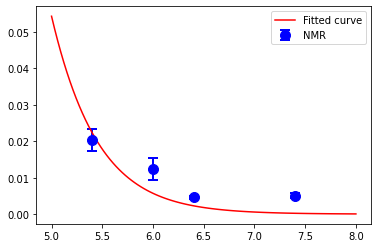

In [14]:
def model(x, pKa):
    return 1.0/(1.0 + 10**(x-pKa))

x_data = np.array([5.4, 6.0, 6.4, 7.4])
pB = unp.uarray([2.033, 1.24, 0.457, 0.511], [0.307, 0.3, 0.046, 0.061])/100.0
y_data = unp.nominal_values(pB)

params, covariance = curve_fit(model, x_data, y_data, p0=[7.0])

pKa_fit = params
print(f"Fitted parameter: pKa = {pKa_fit}")

# Plot the results
plt.errorbar(x=x_data, y=y_data, yerr=unp.std_devs(pB), label='NMR',
             marker='o', markersize=10, elinewidth=2, capsize=5,
             capthick=2, color='blue', ls="")

x_data = np.linspace(5.0, 8, 100)
plt.plot(x_data, model(x_data, *params), color='red', label='Fitted curve')
#plt.yscale('log')
plt.legend()
plt.show()


Fitted parameter: pKa (ES) = 6.497838961241222, pKa (GS) = 5.515775091683569, Kconf = 0.0034962074399925327


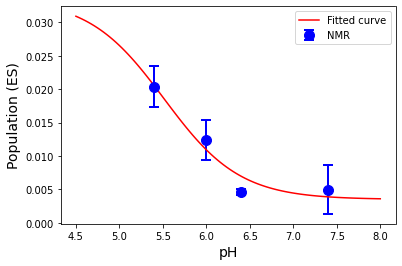

In [3]:
def model(x, pKaES, pKaGS, Kconf):
    return Kconf*(1.0 + 10**(pKaES-x))/(1.0 + 10**(pKaGS-x))

x_data = np.array([5.4, 6.0, 6.4, 7.4])
pB = unp.uarray([2.033, 1.24, 0.457, 0.498], [0.307, 0.3, 0.046, 0.365])/100.0
y_data = unp.nominal_values(pB)

params, covariance = curve_fit(model, x_data, y_data, p0=[7.0, 5.0, 0.001])

pKaES, pKaGS, Kconf = params
print(f"Fitted parameter: pKa (ES) = {pKaES}, pKa (GS) = {pKaGS}, Kconf = {Kconf}")

# Plot the results
plt.errorbar(x=x_data, y=y_data, yerr=unp.std_devs(pB), label='NMR',
             marker='o', markersize=10, elinewidth=2, capsize=5,
             capthick=2, color='blue', ls="")

x_data = np.linspace(4.5, 8, 100)
plt.plot(x_data, model(x_data, *params), color='red', label='Fitted curve')
#plt.yscale('log')
plt.xlabel('pH', fontsize=14)
plt.ylabel('Population (ES)', fontsize=14)
plt.legend()
plt.show()

Fitted parameter: pKa (ES) = 6.474204411226847, pKa (GS) = 5.48832196661496, Kconf = 0.0036229431957717577


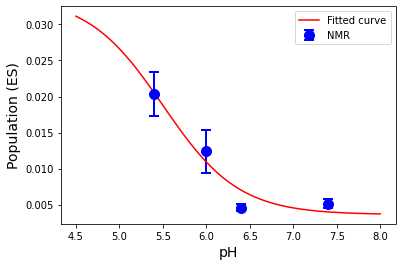

In [5]:
def model(x, pKaES, pKaGS, Kconf):
    K = Kconf*(1.0 + 10**(pKaES-x))/(1.0 + 10**(pKaGS-x))
    return K/(K+1)

x_data = np.array([5.4, 6.0, 6.4, 7.4])
pB = unp.uarray([2.033, 1.24, 0.457, 0.511], [0.307, 0.3, 0.046, 0.061])/100.0
y_data = unp.nominal_values(pB)

params, covariance = curve_fit(model, x_data, y_data, p0=[7.0, 5.0, 0.001])

pKaES, pKaGS, Kconf = params
print(f"Fitted parameter: pKa (ES) = {pKaES}, pKa (GS) = {pKaGS}, Kconf = {Kconf}")

# Plot the results
plt.errorbar(x=x_data, y=y_data, yerr=unp.std_devs(pB), label='NMR',
             marker='o', markersize=10, elinewidth=2, capsize=5,
             capthick=2, color='blue', ls="")

x_data = np.linspace(4.5, 8, 100)
plt.plot(x_data, model(x_data, *params), color='red', label='Fitted curve')
plt.xlabel('pH', fontsize=14)
plt.ylabel('Population (ES)', fontsize=14)
plt.legend()
plt.show()

Fitted parameter: pKa (ES) = 5.48832196661496, pKa (GS) = 6.474204411226847, Kconf = [0.31837534]


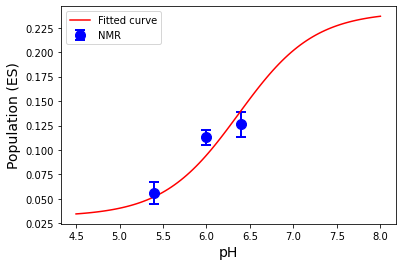

In [28]:
# UUCG-ES2:
def model(x, Kconf):
    pKaES = 5.48832196661496
    pKaGS = 6.474204411226847
    K = Kconf*(1.0 + 10**(pKaES-x))/(1.0 + 10**(pKaGS-x))
    return K/(K+1)

x_data = np.array([5.4, 6.0, 6.4, ])
pB = unp.uarray([5.564, 11.29, 12.618], [1.126, 0.742, 1.284])/100.0
y_data = unp.nominal_values(pB)



Kconf,_ = curve_fit(model, x_data, y_data, p0=[0.001])
print(f"Fitted parameter: pKa (ES) = {pKaES}, pKa (GS) = {pKaGS}, Kconf = {Kconf}")

# Plot the results
plt.errorbar(x=x_data, y=y_data, yerr=unp.std_devs(pB), label='NMR',
             marker='o', markersize=10, elinewidth=2, capsize=5,
             capthick=2, color='blue', ls="")

x_data = np.linspace(4.5, 8, 100)
plt.plot(x_data, model(x_data, Kconf), color='red', label='Fitted curve')
plt.xlabel('pH', fontsize=14)
plt.ylabel('Population (ES)', fontsize=14)
plt.legend()
plt.show()

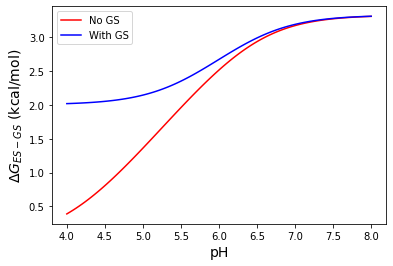

In [10]:
def model1(x, pKaES, pKaGS, Kconf):
    K = Kconf*(1.0 + 10**(pKaES-x))
    return -0.592 * np.log(K/(K+1))

def model2(x, pKaES, pKaGS, Kconf):
    K = Kconf*(1.0 + 10**(pKaES-x))/(1.0 + 10**(pKaGS-x))
    return -0.592 * np.log(K/(K+1))


x_data = np.linspace(4, 8, 100)
plt.plot(x_data, model1(x_data, 6.474204411226847, 5.48832196661496, 0.0036229431957717577), color='red', label='No GS')
plt.plot(x_data, model2(x_data, 6.474204411226847, 5.48832196661496, 0.0036229431957717577), color='blue', label='With GS')

plt.xlabel('pH', fontsize=14)
plt.ylabel(r"$\Delta G_{ES-GS}$ (kcal/mol)", fontsize=14)
plt.legend()
plt.show()

Fitted parameter: pKa (ES) = 5.889243241613787,  Kconf = 0.005230780161261941


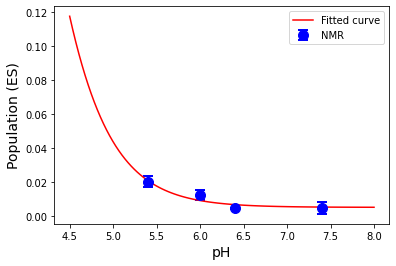

In [4]:
def model(x, pKaES, Kconf):
    return Kconf*(1.0 + 10**(pKaES-x))/(1.0 + Kconf + Kconf*10**(pKaES-x))

x_data = np.array([5.4, 6.0, 6.4, 7.4])
pB = unp.uarray([2.033, 1.24, 0.457, 0.498], [0.307, 0.3, 0.046, 0.365])/100.0
y_data = unp.nominal_values(pB)

params, covariance = curve_fit(model, x_data, y_data, p0=[7.0, 0.001])

pKaES, Kconf = params
print(f"Fitted parameter: pKa (ES) = {pKaES},  Kconf = {Kconf}")

# Plot the results
plt.errorbar(x=x_data, y=y_data, yerr=unp.std_devs(pB), label='NMR',
             marker='o', markersize=10, elinewidth=2, capsize=5,
             capthick=2, color='blue', ls="")

x_data = np.linspace(4.5, 8, 100)
plt.plot(x_data, model(x_data, *params), color='red', label='Fitted curve')
#plt.yscale('log')
plt.xlabel('pH', fontsize=14)
plt.ylabel('Population (ES)', fontsize=14)
plt.legend()
plt.show()

In [8]:
# pH dependent data:

df = pd.read_excel("pH_data.xlsx", sheet_name='Sheet1')
kex = unp.uarray(df['kex'], df['kex_error'])
pb = unp.uarray(df['pB'], df['pB_error'])
kf = pb * kex / 100.0
kr = kex - kf

df['kf'] = unp.nominal_values(kf)
df['kf_error'] = unp.std_devs(kf)
df['kr'] = unp.nominal_values(kr)
df['kr_error'] = unp.std_devs(kr)

print(df)

     Sample   Solvent   pH     pB  pB_error  kex  kex_error        kf  \
0     wtTAR   10% D2O  6.4  0.511     0.061  497         78   2.53967   
1     wtTAR   10% D2O  5.4  2.033     0.307  460         82   9.35180   
2     wtTAR   10% D2O  6.0  1.240     0.300  333         94   4.12920   
3     wtTAR   10% D2O  7.4  0.511     0.061   94         67   0.48034   
4     wtTAR  100% D2O  6.4  0.294     0.016  796         75   2.34024   
5     c7A27   10% D2O  6.4  1.690     0.100  614         52  10.37660   
6  c7A27-2U   10% D2O  6.4  1.520     0.170  928        177  14.10560   

   kf_error         kr    kr_error  
0  0.500777  494.46033   77.602012  
1  2.184811  450.64820   80.345352  
2  1.535130  328.87080   92.839775  
3  0.347138   93.51966   66.657655  
4  0.254639  793.65976   74.779608  
5  1.072047  603.62340   51.124887  
6  3.118826  913.89440  174.316739  


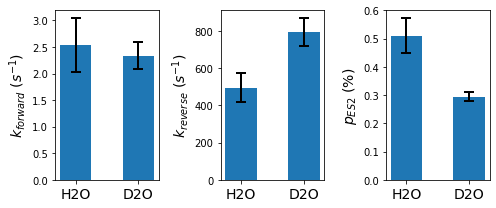

In [38]:
d = df.loc[(df.Sample == "wtTAR") & (df.pH == 6.4)]

fig, ax = plt.subplots(1, 3, figsize=(7,3))
location = np.array([1,2])

ax[0].bar(x=location, height=d['kf'], width=0.5)
ax[0].errorbar(x=location, y=d['kf'], yerr=d['kf_error'], elinewidth=2,
               capsize=5, capthick=2, ecolor='k', ls="")

ax[1].bar(x=location, height=d['kr'], width=0.5)
ax[1].errorbar(x=location, y=d['kr'], yerr=d['kr_error'], elinewidth=2,
               capsize=5, capthick=2, ecolor='k', ls="")

ax[2].bar(x=location, height=d['pB'], width=0.5)
ax[2].errorbar(x=location, y=d['pB'], yerr=d['pB_error'], elinewidth=2,
               capsize=5, capthick=2, ecolor='k', ls="")

ax[0].set_ylabel(r"$k_{forward}$ ($s^{-1}$)", fontsize=14)
ax[1].set_ylabel(r"$k_{reverse}$ ($s^{-1}$)", fontsize=14)
ax[2].set_ylabel(r"$p_{ES2}$ (%)", fontsize=14)

ax[0].set_xticks([1, 2], [r"H2O", r"D2O"], fontsize=14)
ax[1].set_xticks([1, 2], [r"H2O", r"D2O"], fontsize=14)
ax[2].set_xticks([1, 2], [r"H2O", r"D2O"], fontsize=14)


fig.tight_layout()
plt.savefig('D2O_Effect.pdf')

(6.2+/-2.2)e+06
(3.4+/-0.4)e+02


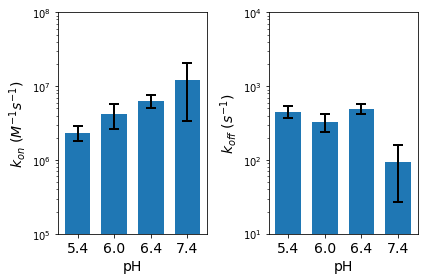

In [106]:
d = df.iloc[:4, :].sort_values(by=['pH'])

kf = unp.uarray(d['kf'], d['kf_error'])
kr = unp.uarray(d['kr'], d['kr_error'])
kon = kf / 10**(-d['pH'])

fig, ax = plt.subplots(1,2, figsize=(6,4))

ax[0].bar(x=[1,2,3,4], height=unp.nominal_values(kon), width=0.7)
ax[0].errorbar(x=[1,2,3,4], y=unp.nominal_values(kon), yerr=unp.std_devs(kon),
               elinewidth=2, capsize=5, ls="", capthick=2, ecolor='k')
ax[0].set_yscale('log')
ax[0].set_ylim(1E5, 1E8)
ax[0].set_ylabel(r"$k_{on}$ ($M^{-1}s^{-1}$)", fontsize=14)
ax[0].set_xlabel("pH",fontsize=14)
ax[0].hlines()


ax[1].bar(x=[1,2,3,4], height=unp.nominal_values(kr), width=0.7)
ax[1].errorbar(x=[1,2,3,4], y=unp.nominal_values(kr), yerr=unp.std_devs(kr),
               elinewidth=2, capsize=5, ls="", capthick=2, ecolor='k')
ax[1].set_yscale('log')
ax[1].set_ylim(1E1, 1E4)
ax[1].set_ylabel(r"$k_{off}$ ($s^{-1}$)", fontsize=14)
ax[1].set_xlabel("pH", fontsize=14)

ax[0].set_xticks([1, 2, 3, 4], [5.4, 6.0, 6.4, 7.4], fontsize=14)
ax[1].set_xticks([1, 2, 3, 4], [5.4, 6.0, 6.4, 7.4], fontsize=14)


fig.tight_layout()
plt.savefig("pH_dependence_barplot.pdf")

print((kon[0]+kon[1]+kon[2]+kon[3])/4.0)
print((kr[0]+kr[1]+kr[2]+kr[3])/4.0)

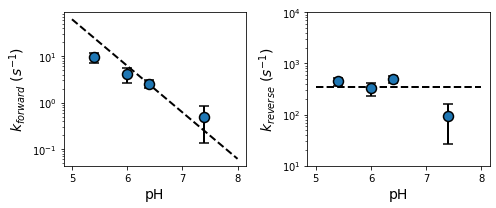

In [110]:
d = df.iloc[:4, :].sort_values(by=['pH'])
fig, ax = plt.subplots(1, 2, figsize=(7,3))

ax[0].errorbar(x=d['pH'], y=d['kf'], yerr=d['kf_error'], elinewidth=2, capsize=5, ls="",
               capthick=2, ecolor='k', marker='o', markersize=10, mec='k', markeredgewidth=1.5)
pHs = np.linspace(5, 8)
kon = 6.2E6
ax[0].plot(pHs, kon*(10**-pHs), ls='--', lw=2, color='k')
ax[0].set_yscale('log')
ax[0].set_ylabel(r"$k_{forward}$ ($s^{-1}$)", fontsize=14)
ax[0].set_xlabel("pH", fontsize=14)


koff = 3.4E2
ax[1].errorbar(x=d['pH'], y=d['kr'], yerr=d['kr_error'], elinewidth=2, capsize=5, ls="",
               capthick=2, ecolor='k', marker='o', markersize=10, mec='k', markeredgewidth=1.5)
ax[1].plot(pHs, koff*np.array([1]*50), ls='--', lw=2, color='k')
ax[1].set_yscale('log')
ax[1].set_ylim(10, 10000)
ax[1].set_ylabel(r"$k_{reverse}$ ($s^{-1}$)", fontsize=14)
ax[1].set_xlabel("pH", fontsize=14)

fig.tight_layout()
plt.savefig("pH_dependence_correlation.pdf")

In [111]:
print(df)

     Sample   Solvent   pH     pB  pB_error  kex  kex_error        kf  \
0     wtTAR   10% D2O  6.4  0.511     0.061  497         78   2.53967   
1     wtTAR   10% D2O  5.4  2.033     0.307  460         82   9.35180   
2     wtTAR   10% D2O  6.0  1.240     0.300  333         94   4.12920   
3     wtTAR   10% D2O  7.4  0.511     0.061   94         67   0.48034   
4     wtTAR  100% D2O  6.4  0.294     0.016  796         75   2.34024   
5     c7A27   10% D2O  6.4  1.690     0.100  614         52  10.37660   
6  c7A27-2U   10% D2O  6.4  1.520     0.170  928        177  14.10560   

   kf_error         kr    kr_error  
0  0.500777  494.46033   77.602012  
1  2.184811  450.64820   80.345352  
2  1.535130  328.87080   92.839775  
3  0.347138   93.51966   66.657655  
4  0.254639  793.65976   74.779608  
5  1.072047  603.62340   51.124887  
6  3.118826  913.89440  174.316739  


1.09+/-0.24
0.62+/-0.11
-0.24+/-0.06


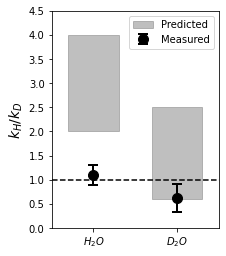

In [154]:
# Plot D2O Fold Change:
d = df.iloc[[0, 4], :]

kf = unp.uarray(d['kf'], d['kf_error'])
kr = unp.uarray(d['kr'], d['kr_error'])
pB = unp.uarray(d['pB'], d['pB_error'])
pH = 6.4

DpKa = unp.log10((pB[1]/(100-pB[1]))/(pB[0]/(100-pB[0])))

kf_fold = kf[0]/kf[1]
kr_fold = kr[0]/kr[1]

print(kf_fold)
print(kr_fold)
print(DpKa)

fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.fill_between([1.7, 2.3], [2, 2], [4, 4], color='grey', alpha=0.5)
ax.fill_between([2.7, 3.3], [0.6, 0.6], [2.5, 2.5], color='grey', alpha=0.5, label='Predicted')
ax.set_xlim(1.5, 3.5)
ax.set_ylim(0, 4.5)
ax.errorbar(x=[2, 3], y=[1.09, 0.62], yerr=[0.21, 0.29], ls="", marker="o", ecolor='k', elinewidth=2,
            capsize=5, capthick=2, color='k', markersize=10, label = 'Measured')

ax.set_ylabel(r"$k_H/k_D$", fontsize=14)
ax.set_xticks(ticks=[2, 3], labels=[r"$H_2O$", r"$D_2O$"])
plt.axhline(y=1, ls='--', color='k')
plt.legend(fontsize=10)
plt.savefig("KIE_Effect_ES2.pdf")

In [1]:
6E11*10**(-6.4)

238864.30233209816